In [33]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import numpy as np
import sklearn

In [34]:
 #TODO Update file, so your data is actually read in
DATA_FILE = 'Eco.csv'
SPLIT_PERC = 0.2

In [35]:

#read the data and return the data as two lists (ind and dep variables)
def readData(fname):
    names = ["Length of Membership", "Yearly Amount Spent"]
    df = pandas.read_csv(fname)
    x = df[[names[0]]].to_numpy()
    x = x.reshape(x.shape[0],1)

    y = df[[names[1]]].to_numpy()
    y = y.reshape(x.shape[0],1)
    
   
    return df, train_test_split(x, y, test_size=SPLIT_PERC)


In [36]:
lom = df['Length of Membership'].tolist()
ysm = df['Yearly Amount Spent'].tolist()
#The linear regression algorithm. Takes a list of lists as input
avg_lom = df['Length of Membership'].mean()
avg_ysm = df['Yearly Amount Spent'].mean()


def lreg(lom,ysm):
    params = []
    num = 0
    den = 0  
    z = 0
    for i in lom:
        num = num + (lom[z]-avg_lom)*(ysm[z]-avg_ysm)
        den = den + (lom[z]-avg_lom)**2
        z = z+1

    theta_1 = (num/den) 
    theta_0 = (avg_ysm-(theta_1)*(avg_lom))
   
    params.append(theta_1)
    params.append(theta_0)
    return params

In [37]:
def predict(params, x):
    m = params[0]
    b = params[1]
    y_hat = (m * x) + b
    x = np.linspace(1, 6, 100) 
    
    y = (m * x) + b
    fig = plt.figure(figsize = (11, 5)) 
    # Create the plot 
    plt.scatter(lom, ysm)
    plt.plot(x, y,'r') 
  
    # Show the plot 
    plt.show()
    
    return y_hat


def printParams(params):
    print("The value of B0 (intercept) is: ", params[1])
    print("The value of B1 (slope) is: ", params[0])

The value of B0 (intercept) is:  [275.08363796]
The value of B1 (slope) is:  [63.45913115]


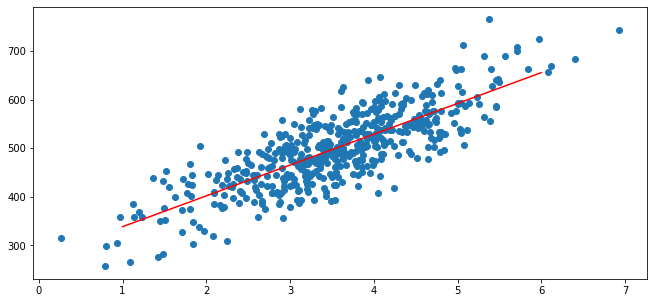

[465.46103142]


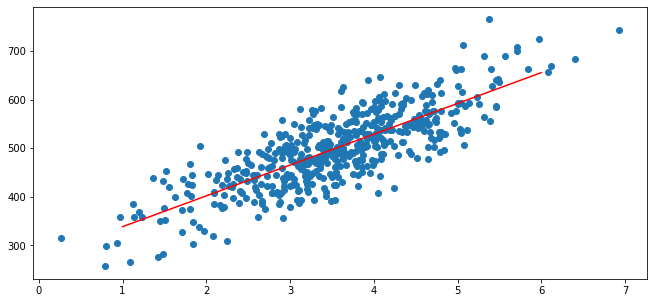

0.6507475590861188


In [38]:
"""
this is the main routine of the program. You should not have to modify anything here.
Additions at the bottom are OK, as noted
"""
if __name__ == "__main__":
    df, (xTrain, xTest, yTrain, yTest) = readData(DATA_FILE)
    parameters = lreg(xTrain,yTrain)
    printParams(parameters)
    print(predict(parameters, 3))

    #TODO Validation metrics and visualization
    #SciKit Learn and plotting functions OK here
    print(sklearn.metrics.r2_score(yTest, predict(parameters, xTest)))
   
   
    
    


In [40]:
#SciKit Evaluation Check
x = df['Length of Membership']
y = df['Yearly Amount Spent']
X_train, X_test , y_train, y_test = train_test_split(x,y)
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

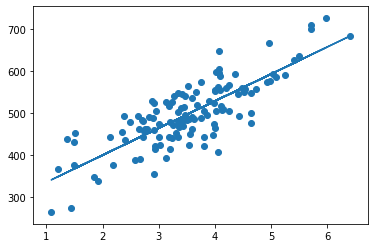

In [42]:
prediction = lr.predict(X_test.values.reshape(-1,1))

plt.plot(X_test, prediction,)
plt.scatter(X_test, y_test )
plt.show()

In [49]:
sklearn.metrics.r2_score(y_test,prediction)

0.6515238719590539